In [724]:
#Theme change
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [725]:
#For data manipulation
import pandas as pd
import numpy as np

#For visualisation
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
import missingno as msn

#For preprocessing
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#For evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Other
from warnings import filterwarnings
from scipy.stats import zscore
%matplotlib inline

#For modeling
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

In [726]:
sns.set(style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
filterwarnings(action = 'ignore')
%matplotlib inline

In [727]:
raw = pd.read_csv('train.csv')
df = raw.copy()

In [305]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

#Data Cleaning and Preprocessing

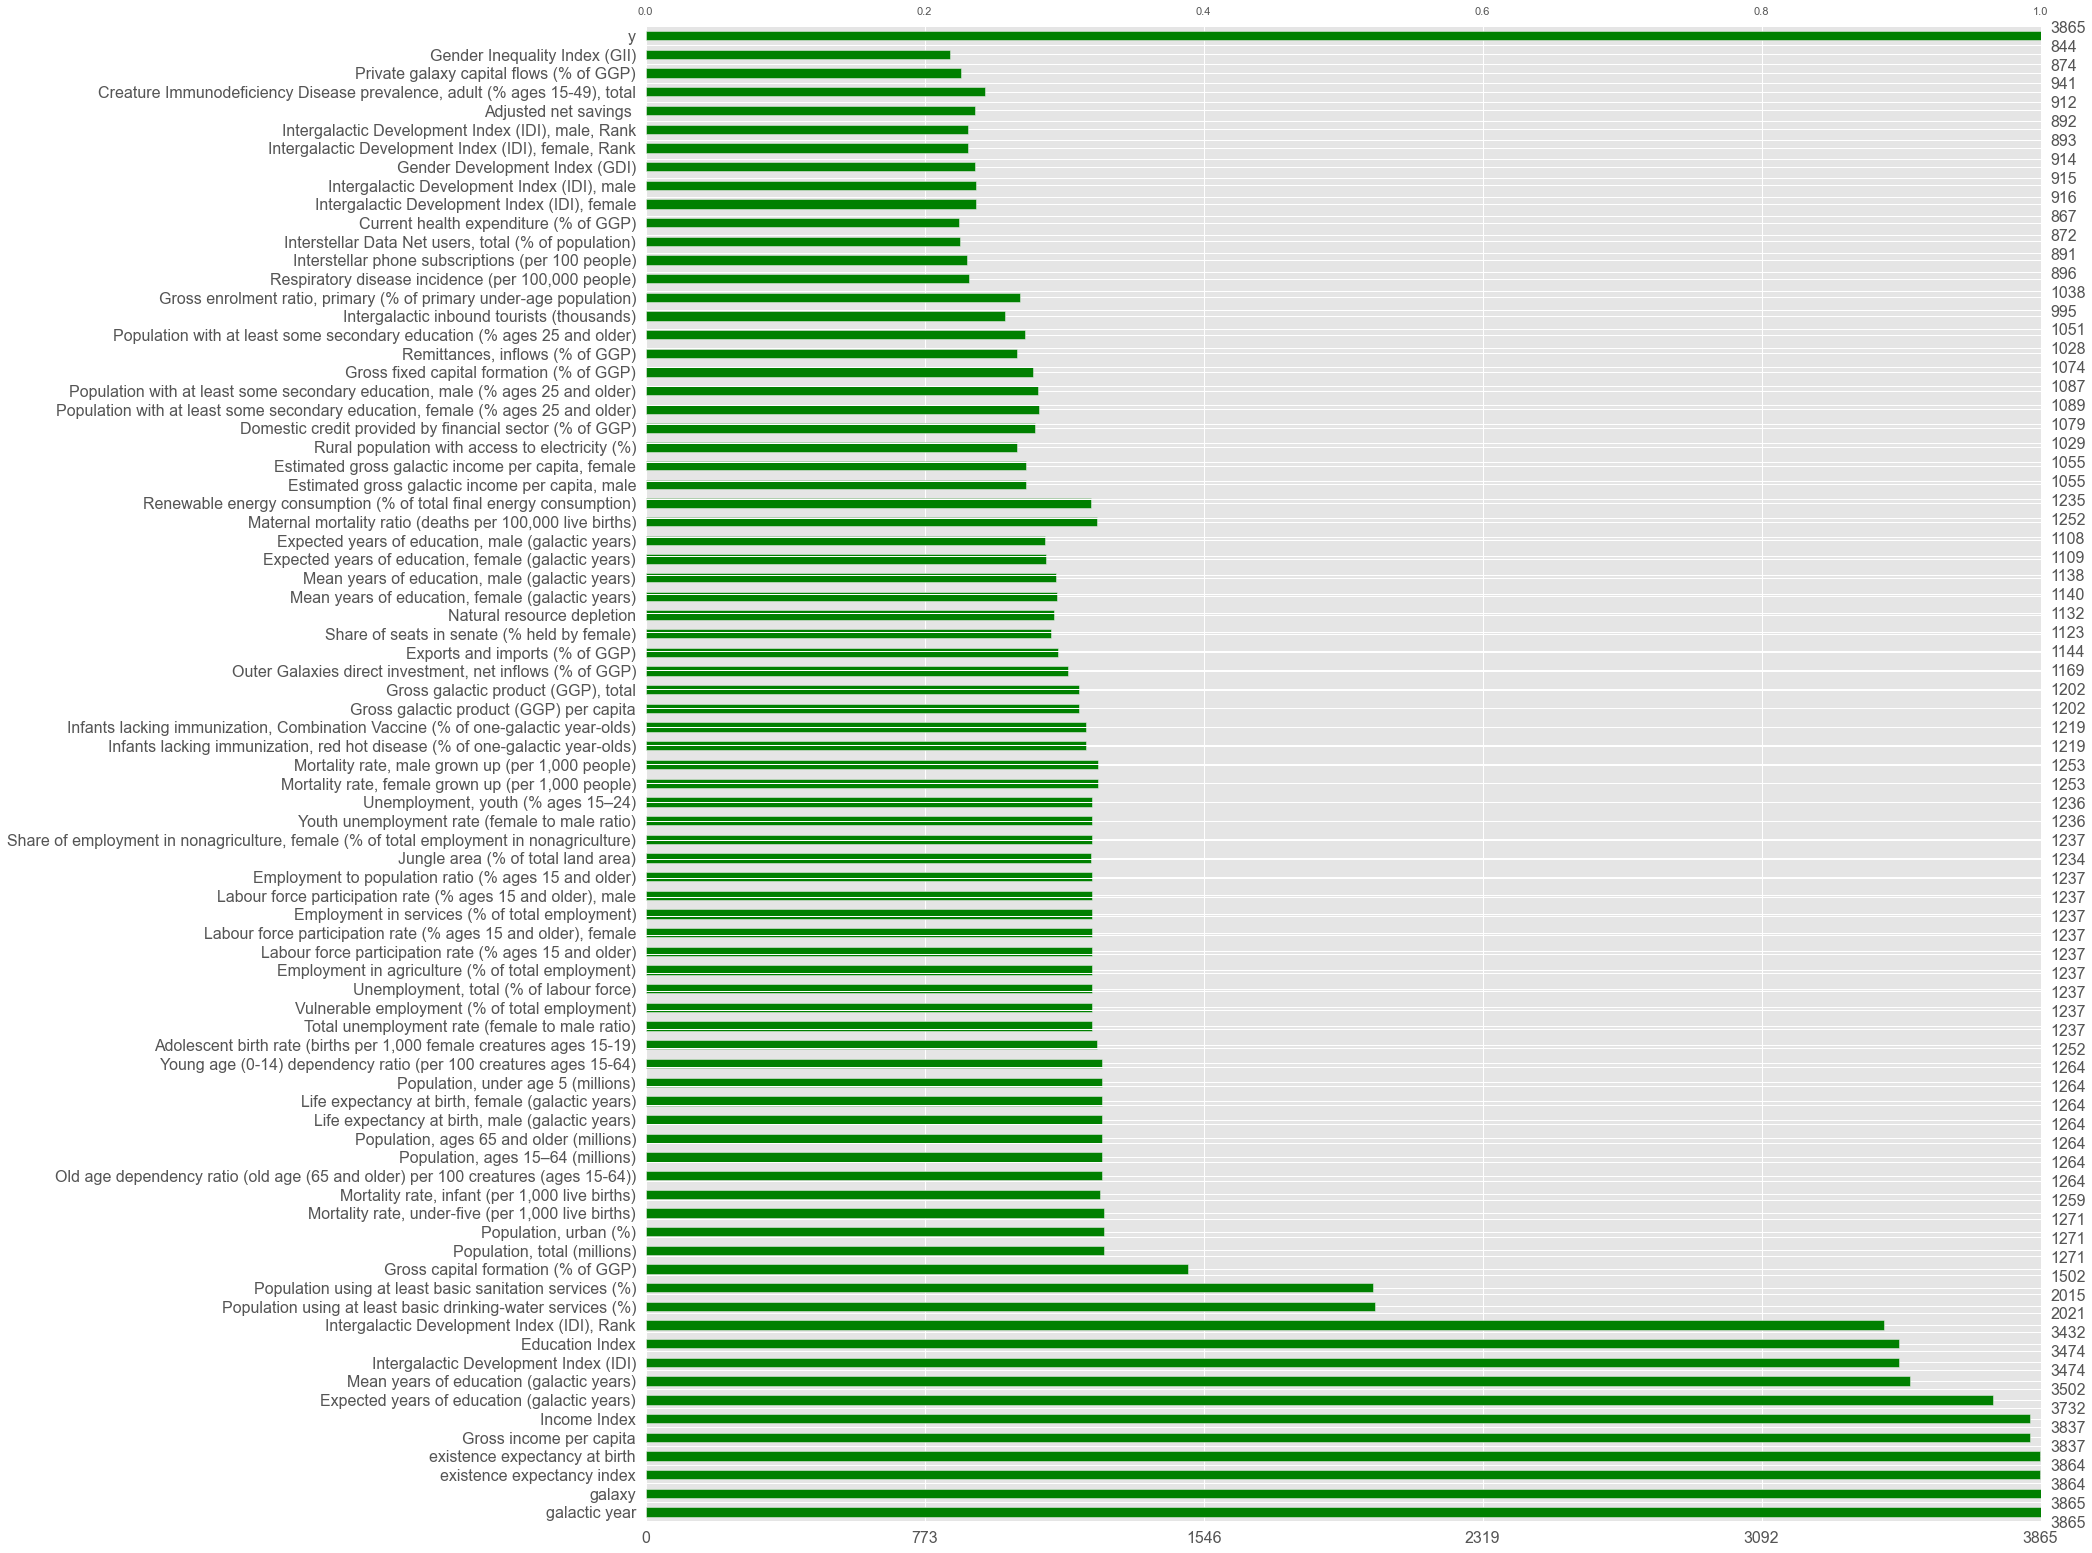

In [372]:
#Visualising the null values
msn.bar(df, color='green')
plt.show()

In [728]:
%%time
#This is the data we're gonna work on
df = df[[f for f in df.columns if f in df.iloc[:,0:13].columns or f=='y']]

Wall time: 227 ms


In [729]:
df.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,0.154247


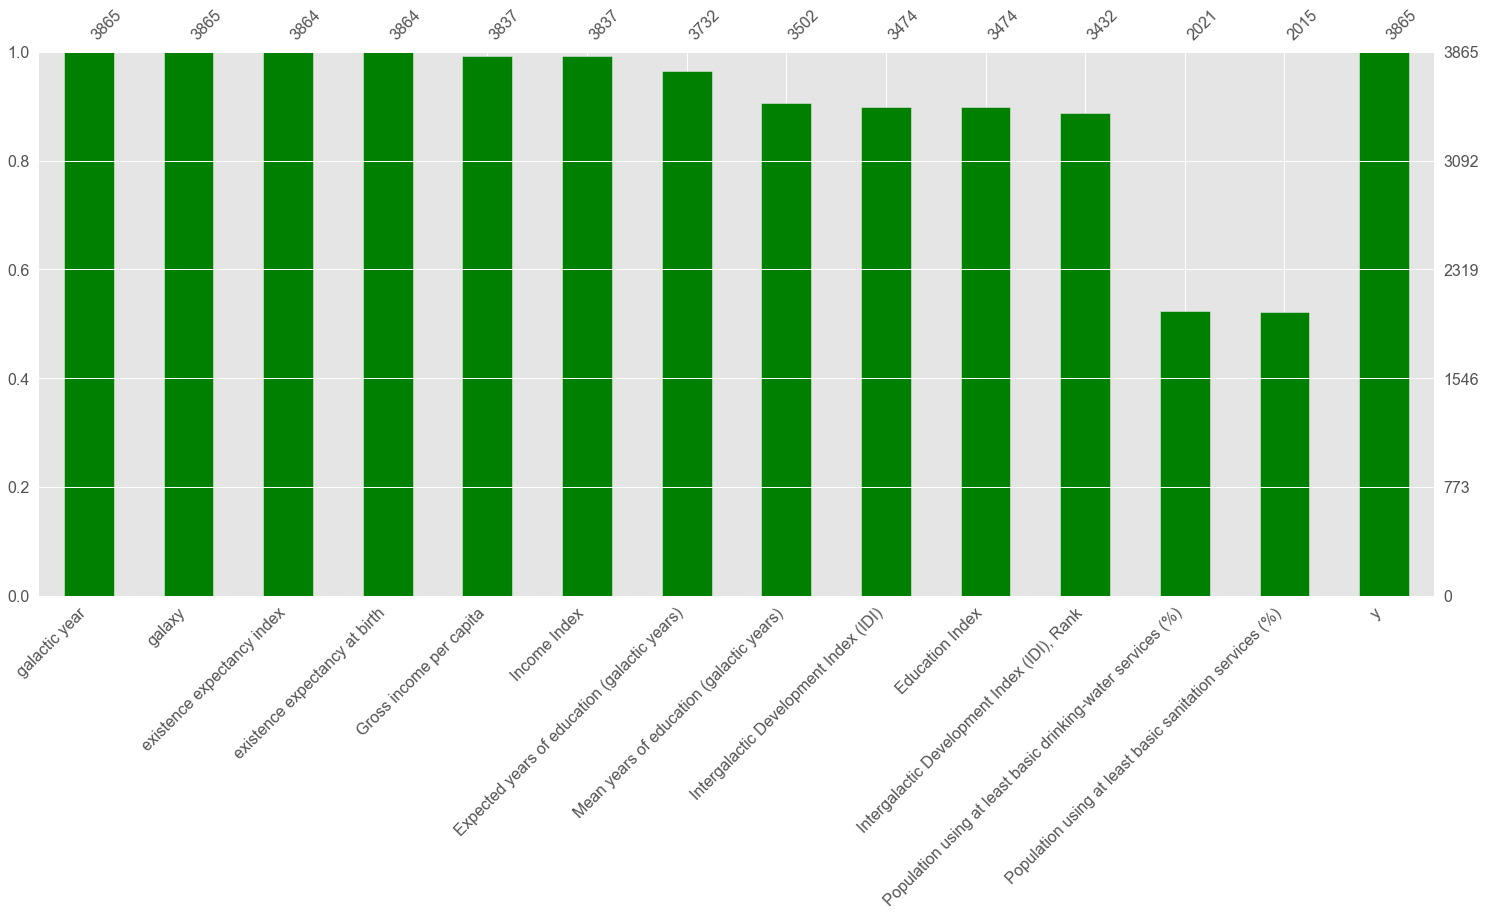

In [730]:
#Null value count after the elimination
msn.bar(df, color='green')
plt.show()

In [615]:
''' Missing values ratio
per column
'''
def column_null_ratio(data):
    ratio = []
    for f in data.columns:
        n_missing = data[f].isna().sum()
        ratio.append(n_missing / data.shape[0])
    return ratio

In [616]:
#Ratio of null values to the entire records
column_null_ratio(df)

[0.0,
 0.0,
 0.000258732212160414,
 0.000258732212160414,
 0.007244501940491591,
 0.007244501940491591,
 0.034411384217335056,
 0.09391979301423027,
 0.10116429495472186,
 0.10116429495472186,
 0.11203104786545925,
 0.47710219922380337,
 0.47865459249676584,
 0.0]

In [731]:
#Let's make sure the values have no whitespaces at the beginning or at the end
def values_stripper(data):
    for f in data.columns:
        if data[f].dtype == 'O':
            data[f] = data[f].str.strip()
            print(f'The unique values for {f} variable: {data[f].unique()}\n')
values_stripper(df)            

The unique values for galaxy variable: ['Large Magellanic Cloud (LMC)' 'Camelopardalis B' 'Virgo I'
 'UGC 8651 (DDO 181)' 'Tucana Dwarf' 'KKh 060' 'Grus II' 'UGCA 292'
 'Aquarius II' 'Andromeda XI' 'Antlia Dwarf' 'IC 1613 (UGC 668)' 'Leo P'
 'Cassiopeia Dwarf (Cas dSph, Andromeda VII)' 'Draco II' 'Sagittarius II'
 'Carina III' 'UGCA 133 (DDO 44)' 'Lacerta I (Andromeda XXXI)' 'Boötes IV'
 'Maffei 2' 'KUG 1210+301B (KK98 127)' 'Andromeda V'
 'Sagittarius Dwarf Sphr SagDEG' 'UGCA 276 (DDO 113)' 'Ursa Minor Dwarf'
 'UGC 9128 (DDO 187)' 'Andromeda XX' 'Segue 2' 'Fornax Dwarf (E356-G04)'
 'Columba I' 'KK98 77' 'Holmberg II (DDO 50, UGC 4305)'
 'ESO 540-030 (KDG 2)' 'NGC 404' 'UGC 8833' 'Perseus I (Andromeda XXXIII)'
 'Horologium II' 'Andromeda XXVI' 'Grus I' 'Andromeda IX'
 'Andromeda XXII[57]' 'ESO 274-01[70]' 'Leo II Dwarf (Leo B, DDO 93)'
 'Reticulum II' 'Andromeda II' 'Indus II' 'MB 1 (KK98 21)' 'UGCA 105'
 'Crater II' 'Andromeda XVIII[60]' 'KKH 11 (ZOAG G135.74-04.53)'
 'Phoenix Dwarf G

In [732]:
#Checking the duplicates
def duplicate_check_remove(data):
    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f'The number of duplicate rows before: {num_duplicates}')
        data.drop_duplicates(inplace = True)
        print(f'The number of duplicate rows now: {data.duplicated().sum()}')
    else:
        print('There are no duplicate rows in the dataset.')
duplicate_check_remove(df)        

There are no duplicate rows in the dataset.


In [733]:
'''For the categorical columns, 
we'll be using Target Encoding instead of One-hot-encoding 
since the latter would cause massive Multicollinearity which is
one of the assumptions to build a Linear Regression model
'''
#Checking the number of y instances per galactic year before Target Encoding
#We discover that there's isn't a gigantic gap between the classes
display(df.groupby('galactic year').count()['y'].to_frame().T, 
        df.groupby('galaxy').count()['y'].to_frame().T)

galactic year,990025,991020,992016,993012,994009,995006,996004,997002,998001,999000,1000000,1001000,1002001,1003002,1004004,1005006,1006009,1007012,1008016,1009020,1010025,1011030,1012036,1013042,1014049,1015056
y,181,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,90,90,90,90,90,90,89,88,87


galaxy,Andromeda Galaxy (M31),Andromeda I,Andromeda II,Andromeda III,Andromeda IX,Andromeda V,Andromeda VIII,Andromeda X,Andromeda XI,Andromeda XII,Andromeda XIX[60],Andromeda XV,Andromeda XVII,Andromeda XVIII[60],Andromeda XX,Andromeda XXIII,Andromeda XXII[57],Andromeda XXIV,Andromeda XXIX,Andromeda XXI[57],Andromeda XXV,Andromeda XXVI,Andromeda XXVIII,Antlia 2,Antlia B,Antlia Dwarf,Aquarius Dwarf Galaxy (DDO 210),Aquarius II,Barnard's Galaxy (NGC 6822),Boötes I,Boötes II,Boötes III,Boötes IV,Camelopardalis B,Canes Venatici I Dwarf,Canes Venatici II Dwarf,Carina Dwarf (E206-G220),Carina II,Carina III,Cas 1 (KK98 19),"Cassiopeia Dwarf (Cas dSph, Andromeda VII)",Cassiopeia II (Andromeda XXX),Cassiopeia III (Andromeda XXXII),Cetus Dwarf,Cetus III,Columba I,Coma Berenices Dwarf,Crater II,DDO 99 (UGC 6817),Donatiello I,Draco Dwarf (DDO 208),Draco II,Dwingeloo 1,Dwingeloo 2,ESO 274-01[70],ESO 294-010,ESO 321-014[70],ESO 325-11,ESO 383-087 (ISG 39),ESO 410-G005,ESO 540-030 (KDG 2),ESO 540-032,Eridanus II,FM2000 1,Fornax Dwarf (E356-G04),GR 8 (DDO 155),Grus I,Grus II,HIPASS J1247-77,HIZSS 003,Hercules Dwarf,"Holmberg II (DDO 50, UGC 4305)",Horologium I,Horologium II,Hydra II,Hydrus I,IC 10 (UGC 192),IC 1613 (UGC 668),IC 3104,IC 342,IC 4662 (ESO 102-14),IC 5152,Indus II,KK98 35,KK98 77,KKH 11 (ZOAG G135.74-04.53),KKH 12,KKH 37 (Mai 16),KKR 03 (KK98 230),KKR 25,KKh 060,KKh 086,KKh 98,KKs 3,KUG 1210+301B (KK98 127),Lacerta I (Andromeda XXXI),Large Magellanic Cloud (LMC),"Leo A (Leo III, DDO 69)","Leo I Dwarf (DDO 74, UGC 5470)","Leo II Dwarf (Leo B, DDO 93)",Leo IV Dwarf,Leo P,Leo T Dwarf,Leo V Dwarf,M110 (NGC 205),M32 (NGC 221),MB 1 (KK98 21),MB 3,Maffei 1,Maffei 2,NGC 147 (DDO 3),NGC 1560,NGC 1569 (UGC 3056),NGC 185,NGC 2366,NGC 2403,NGC 247,NGC 300,NGC 3109,NGC 3741,NGC 404,NGC 4163 (NGC 4167),NGC 4214 (UGC 7278),NGC 5102,NGC 5206,NGC 5237,NGC 5253,NGC 55,Pegasus Dwarf Irregular (DDO 216),Pegasus Dwarf Sph (And VI),Pegasus III,Perseus I (Andromeda XXXIII),Phoenix Dwarf Galaxy (P 6830),Phoenix II,Pictor II,Pisces Dwarf,Pisces I,Pisces II,Pisces III (Andromeda XIII),Pisces IV (Andromeda XIV),Pisces V (Andromeda XVI),Reticulum II,Reticulum III,Sagittarius Dwarf Irregular Galaxy (SagDIG),Sagittarius Dwarf Sphr SagDEG,Sagittarius II,Sculptor Dwarf (E351-G30),Segue 1,Segue 2,"Sextans A (92205, DDO 75)",Sextans B (UGC 5373),Sextans Dwarf Sph,"Small Magellanic Cloud (SMC, NGC 292)",Triangulum Galaxy (M33),Triangulum II,Tucana Dwarf,Tucana II,Tucana III,Tucana IV,UGC 4483,UGC 4879 (VV124)[61],UGC 7577 (DDO 125),UGC 8508 (I Zw 060),UGC 8651 (DDO 181),UGC 8833,UGC 9128 (DDO 187),UGC 9240 (DDO 190),UGCA 105,UGCA 133 (DDO 44),UGCA 15 (DDO 6),UGCA 276 (DDO 113),UGCA 292,UGCA 438 (ESO 407-018),UGCA 86,UGCA 92,Ursa Major I Dwarf (UMa I dSph),Ursa Major II Dwarf,Ursa Minor Dwarf,Virgo I,Willman 1,"Wolf-Lundmark-Melotte (WLM, DDO 221)"
y,18,18,25,18,18,18,25,17,18,26,26,25,18,22,25,25,26,26,18,17,25,18,25,19,21,22,17,24,18,24,24,19,25,23,18,25,19,19,19,20,18,18,25,25,25,18,19,19,24,19,19,24,19,24,19,21,24,19,19,22,24,19,25,24,18,22,24,24,19,22,23,23,24,24,18,19,25,25,21,23,21,21,24,24,19,19,24,20,22,21,21,19,22,21,22,18,19,18,18,18,25,21,18,18,18,25,24,19,19,24,25,24,23,18,24,21,19,22,22,19,24,19,19,19,24,24,1,22,17,25,25,18,25,19,24,25,19,25,18,25,25,24,19,17,24,19,19,19,19,21,22,24,19,25,19,26,19,24,24,24,21,19,22,24,19,22,24,19,19,20,24,24,21,24,19,24,24,24,24,24,17


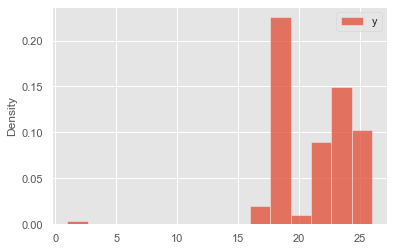

In [687]:
sns.histplot(data=df.groupby('galaxy').count()['y'].to_frame(), stat='density')
plt.show()

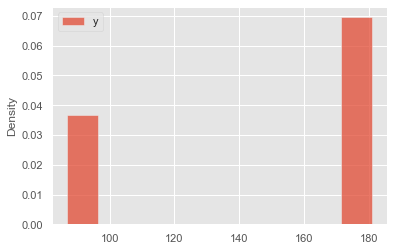

In [688]:
sns.histplot(data=df.groupby('galactic year').count()['y'].to_frame(), bins=10, stat='density')
plt.show()

In [734]:
df['galactic year'] = df['galactic year'].astype('O') 

In [735]:
%%time
df_numeric = df[[f for f in df.columns if df[f].dtype ==np.number and f!='y']]
df_categoric = df[[f for f in df.columns if df[f].dtype =='O']]
target = df['y']

Wall time: 19 ms


In [694]:
#Our data is split according to different data types
display(df_numeric, df_categoric, target, df_numeric.describe().T)

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%)
0,0.628657,63.125200,27109.234310,0.646039,8.240543,10.283959,0.804246,0.745900,135.129178,101.892238,99.936784
1,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,101.892238,99.936784
2,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,101.892238,99.936784
3,0.555862,52.333293,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,101.892238,99.936784
4,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,101.892238,99.936784
...,...,...,...,...,...,...,...,...,...,...,...
3860,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,144.896214,116.585709,121.891775
3861,0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,164.692000,121.672753,115.422812
3862,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,63.726437,125.376956,114.907359
3863,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,216.805701,105.345928,88.416415


,galactic year,galaxy
0,0.081928,0.048690
1,0.081928,0.058252
2,0.081928,0.042739
3,0.081928,0.041462
4,0.081928,0.208075
...,...,...
3860,0.080857,0.064714
3861,0.080857,0.055926
3862,0.080857,0.106390
3863,0.080857,0.046928


0       0.052590
1       0.059868
2       0.050449
3       0.049394
4       0.154247
          ...   
3860    0.042324
3861    0.036725
3862    0.166271
3863    0.024187
3864    0.100069
Name: y, Length: 3865, dtype: float64

,count,mean,std,min,25%,50%,75%,max
existence expectancy index,3865.0,0.872479,0.162346,0.227890,0.763158,0.907358,0.992703,1.246908
existence expectancy at birth,3865.0,76.798111,10.460301,34.244062,69.963373,78.992677,84.558957,100.210053
Gross income per capita,3865.0,31633.240872,18668.369588,-126.906522,20251.444966,26720.887752,36810.074006,151072.683156
Income Index,3865.0,0.825154,0.193351,0.292001,0.677846,0.825166,0.969305,1.361883
Expected years of education (galactic years),3865.0,14.723296,3.549829,3.799663,12.718235,14.802780,17.047393,26.955944
Mean years of education (galactic years),3865.0,10.283959,3.160157,1.928166,7.962169,10.283959,12.614449,19.057648
Intergalactic Development Index (IDI),3865.0,0.804246,0.167088,0.273684,0.693045,0.804246,0.922100,1.232814
Education Index,3865.0,0.745900,0.189417,0.189874,0.619183,0.745900,0.878676,1.269625
"Intergalactic Development Index (IDI), Rank",3865.0,135.129178,49.423493,9.925906,97.497288,135.129178,170.712084,278.786613
Population using at least basic drinking-water services (%),3865.0,101.892238,14.691896,33.135967,101.892238,101.892238,109.327401,136.321824


In [736]:
def target_encoder(data):
    for f in data.columns:
        t = TargetEncoder(smoothing=5)
        data[f] = t.fit_transform(data[f], target) 
target_encoder(df_categoric)        

In [737]:
def impute_missing_numeric(data):
    for f in data.columns:
        data[f].fillna(data[f].mean(), inplace=True)
    return df_numeric.isna().sum()
impute_missing_numeric(df_numeric) 

existence expectancy index                                     0
existence expectancy at birth                                  0
Gross income per capita                                        0
Income Index                                                   0
Expected years of education (galactic years)                   0
Mean years of education (galactic years)                       0
Intergalactic Development Index (IDI)                          0
Education Index                                                0
Intergalactic Development Index (IDI), Rank                    0
Population using at least basic drinking-water services (%)    0
Population using at least basic sanitation services (%)        0
dtype: int64

In [738]:
# Coercing the outliers via IQR method
def impute_outliers(value):
    if value > upperlimit:
        value = upperlimit
    elif value < lowerlimit:
        value = lowerlimit
    return value

for feature in df_numeric.columns:
    Q3 = df_numeric[feature].quantile(q = 0.75)
    Q1 = df_numeric[feature].quantile(q = 0.25)
    IQR = Q3 - Q1
    outlier_range = IQR * 1.7
    upperlimit = Q3 + outlier_range
    lowerlimit = Q1 - outlier_range
    df_numeric[feature] = df_numeric[feature].apply(impute_outliers)

In [739]:
df = pd.concat([df_categoric, df_numeric, target], axis=1)

#EDA (Exploratory Data Analysis)

In [567]:
#distribution of columns, residuals, homoscedacity, spearman correlation
#LR assumptions check

#Modeling

In [740]:
scaler = RobustScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,0:-1])
df = pd.DataFrame(df)

In [741]:
df.tail()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),y
3860,-4.291084,0.169518,0.532994,0.263051,0.458346,0.102685,0.872180,0.058721,0.446732,0.450596,0.133402,1.976214,1.848741,0.042324
3861,-4.291084,-0.044629,0.132918,-0.213460,0.614675,0.357954,0.312088,-0.243385,0.268825,0.006462,0.403782,2.660401,1.304016,0.036725
3862,-4.291084,1.184978,0.561048,0.996712,0.620951,0.892338,1.446862,1.370808,0.784039,1.367586,-0.975250,2.700000,1.260612,0.166271
3863,-4.291084,-0.263854,0.137995,-0.049210,0.088146,-0.471801,-1.250559,-0.295599,-0.299283,-0.551835,1.115574,0.464508,-0.970084,0.024187
3864,-4.291084,1.574260,0.544059,0.866610,2.309301,1.312640,0.948947,1.272178,1.603928,1.307091,-0.972543,1.346657,2.700000,0.100069


In [742]:
X = df.drop('y', axis=1) 
y = df['y']

In [743]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [744]:
model = LinearRegression()
lin = model.fit(X_train, y_train)  

In [745]:
pred = model.predict(X_test.values)

In [751]:
xgb_model = xgb.XGBRegressor()

In [752]:
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

#Evaluation

In [753]:
#Linear Regression model
#Metrics
print(f'R^2: {r2_score(y_test,pred)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, pred, squared=False))}')
print(f'Mean Squared Error: {mean_squared_error(y_test, pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,pred)}')

R^2: 0.9420335343849726
Root Mean Squared Error: 0.014740845193102372
Mean Squared Error: 0.0002172925170070093
Mean Absolute Error: 0.007216383538030435


In [754]:
#XGBoost Regressor model
#Metrics
print(f'R^2: {r2_score(y_test,preds)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, preds, squared=False))}')
print(f'Mean Squared Error: {mean_squared_error(y_test, preds)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,preds)}')

R^2: 0.9785448972331868
Root Mean Squared Error: 0.008968075882706268
Mean Squared Error: 8.04263850379778e-05
Mean Absolute Error: 0.0029689243297537095
